### <u><b> Rules To Follow to Implementation of t-test hypothesis and p-value testing </b></u>

Step - 1:  
Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ >, \ <, \ \neq  $  
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

Step - 2:  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3:
Compute Test Statistic:  
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

#### Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

$ H_1 \; = Bold \ Claim\ that\ they\ are\ not \ serving\ 500\ grams\ of\ biryani $

$ H_0 \ =  They\ are\ serving\ 500\ grams\ of\ biryani$

$ H_0 = Null\ Hypothesis \ \ H_1\ =\ Alternative\ Hypothesis $

In [61]:
#Function body of t-score
def t_score(a,b,c,d):#sample_mean,pop_mean,sd,np.sqrt(sample_size)
    return ((a-b)/(c/d))

## <u> Importing Necessary Libraries </u>


In [62]:
from scipy.stats import t
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from termcolor import colored
import seaborn as sns
sns.set()


## <u> sample data for pista house </u>

In [63]:
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

## Calculating Necessary Sstatistics

In [64]:
sample_size=len(l)
sample_mean=np.mean(l)
pop_mean=500
sd=round(np.std(l,ddof=1),2) ##ddof=1 means calculating for sample standard deviation

### Since there are two possible values upper and lower values then population mean.That's why it Will be a <span style="color:red">two tail testing :

In [65]:

con_level=0.95 ##Confidence value
alpha=1-con_level 
t_critical=t.ppf(1-(alpha/2),len(l)-1) ##obtaining the t_critical using percent point function


## <u> Compute the t-score </u>


In [66]:
t_sc=float(t_score(sample_mean,pop_mean,sd,np.sqrt(sample_size)))


### <u>Conclusion using t test


In [67]:
if(np.abs(t_sc) > t_critical):
    print(colored("Reject Null Hypothesis",'red '))
else:
    print(colored("Fail to reject Null Hypothesis",'blue'))

Fail to reject Null Hypothesis


# <u>Conclusion using p test


In [68]:

p_value = 2 * (1.0 - norm.cdf(np.abs(t_sc)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.2064258410423232
Fail to reject Null Hypothesis


### Ploting the sampling distribution with rejection regions of sample mean


Text(465.3, 0.0007, 'x_bar')

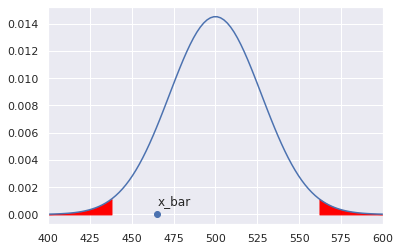

In [69]:

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sd / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


### Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

## <u>Hypothesis
$ H_0 =\ Null\ Hypothesis \ \ H_1=\ Alternate\ Hypothesis $
$ H_0 = No\ the\ Rating\ is\ less\ equal\ to\ 4. $
$ H_1 = The\ Rating\ is\ Greater\ than\ 4 $

### <span style='color:red'><sup>**</sup> </span> Since there are one possible values greater than 4 population mean(>4).That's why it Will be a <span style="color:#ff1692">One tail testing : Right tail test

In [70]:
nlp=[4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]

## <u> Calculate Neccessary Statistics about sample data

In [71]:
sample_size=len(nlp)
sample_mean=np.mean(nlp)
pop_mean=4
sd=round(np.std(nlp,ddof=1),2) ##ddof=1 means calculating for sample standard deviation
sample_size

20

## Initializing the Necessary Variables

In [72]:
con_level=0.99 ##Confidence value
alpha=1-con_level 
t_critical=t.ppf(1-(alpha),sample_size-1) ##obtaining the t_critical using percent point function
t_critical

2.539483190622288

## <span style='color:#428912'> Calculating T-score </span>

In [73]:
t_sc=t_score(sample_mean,pop_mean,sd,np.sqrt(sample_size))
t_sc

1.3153341044116411

### <u>Conclusion using t test


In [74]:
if(np.abs(t_sc) > t_critical):
    print(colored("Reject Null Hypothesis",'red '))
else:
    print(colored("Fail to reject Null Hypothesis",'blue'))

Fail to reject Null Hypothesis


### <u> Conclusion using p-value 

In [75]:
p_value = (1.0 - norm.cdf(np.abs(t_sc)))

print("p_value = ", p_value)

if(p_value < alpha):
    print(colored("Reject Null Hypothesis",'blue'))
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.09419882054165774
Fail to reject Null Hypothesis


### Figure Plotting using matplotlib

Text(4.25, 0.0007, 'x_bar')

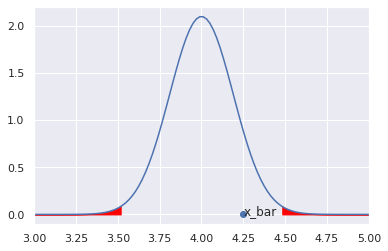

In [76]:

# Defining the x minimum and x maximum
x_min = 3
x_max = np.max(nlp)


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sd / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


#### As in the above graph we can clearly see that the $ \bar{x} $ inside the Null hypothesis range. So we are failed to reject the Null hypothesis ;(

#### Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

## <u>Hypothesis
$ H_0 =\ Null\ Hypothesis \ \ H_1=\ Alternate\ Hypothesis $
$ H_0 = No\ the\ Rating\ is\ less\ equal\ to\ 15. $
$ H_1 = The\ Rating\ is\ Greater\ than\ 15 $

### <span style='color:red'><sup>**</sup> </span> Since there are one possible values greater than Equal 15 population mean(>15).That's why it Will be a <span style="color:#123abc">One tail testing : Right Tail Test

In [77]:
tata=[14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] 

### <span style='color:#abc123'> Calculating the Necessary Statistics 

In [78]:
sample_size=len(tata)
sample_mean=np.mean(tata)
pop_mean=15
sd=round(np.std(tata,ddof=1),2) ##ddof=1 means calculating for sample standard deviation
sd

1.03

### Initializing the Necessary Variables

In [79]:
con_level=0.99 ##Confidence value
alpha=1-con_level 
t_critical=t.ppf(1-(alpha),sample_size-1) ##obtaining the t_critical using percent point function
t_critical

2.539483190622288

### <h3> Calculating T-test </h3>

In [80]:
t_sc=t_score(sample_mean,pop_mean,sd,np.sqrt(sample_size))
t_sc

0.42984607722811574

### <u>Conclusion using t test


In [81]:
if(np.abs(t_sc) > t_critical):
    print(colored("Reject Null Hypothesis",'red'))
else:
    print(colored("Fail to reject Null Hypothesis",'blue'))

Fail to reject Null Hypothesis


### <h3> Conclusion using P-value </h3>

In [82]:
p_value = (1.0 - norm.cdf(np.abs(t_sc)))

print("p_value = ", p_value)

if(p_value < alpha):
    print(colored("Reject Null Hypothesis",'blue'))
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.33365380625351326
Fail to reject Null Hypothesis


### <h3> Graph Plotting </h3>

Text(15.099, 0.0007, 'x_bar')

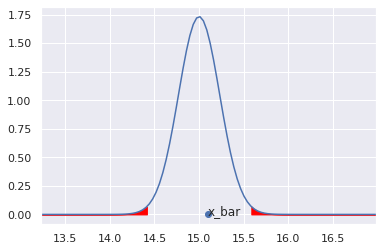

In [83]:

# Defining the x minimum and x maximum
x_min = np.min(tata)
x_max = np.max(tata)


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sd / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


#### Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

In this problem statement we can see that there are total 100 samples, and their mean value is 97.5. Standard Deviation = 7

##### <span style='color:red'><sup>**</sup> </span>As per $ H_0 $ Hypothesis Since there are one possible values greater than Greater than 100.That's why it Will be a <span style="color:#123abc">One tail testing :

## <u>Hypothesis
$ H_0 =\ Null\ Hypothesis \ \ H_1=\ Alternate\ Hypothesis $
$ H_0 = Takes\ more\ than\ equal\ 100\ ms\ $
$ H_1 = Less\ than\ 100\ ms\ time\ $

Metadata of Sample Data

In [84]:
sample_size=100
sample_mean=97.5
pop_mean=100
sd=7

### Initializing the Necessary Variables

In [85]:
con_level=0.90 ##Confidence value
alpha=1-con_level 
t_critical=t.ppf(1-(alpha),sample_size-1) ##obtaining the t_critical using percent point function
t_critical

1.2901614420275025

## <span style='color:#428912'> Calculating T-score </span>

In [86]:
t_sc=t_score(sample_mean,pop_mean,sd,np.sqrt(sample_size))
t_sc

-3.5714285714285716

### <u>Conclusion using t test


In [87]:
if(np.abs(t_sc) > t_critical):
    print(colored("Reject Null Hypothesis",'red'))
else:
    print(colored("Fail to reject Null Hypothesis",'blue'))

Reject Null Hypothesis


### <h3> Conclusion using P-value </h3>

In [88]:
p_value = (1.0 - norm.cdf(np.abs(t_sc)))

print("p_value = ", p_value)

if(p_value < alpha):
    print(colored("Reject Null Hypothesis",'blue'))
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.00017751969037349546
Reject Null Hypothesis


## <h3 style="color:#85fa1b">Graph  Plotting </h3>

Text(97.5, 0.0007, 'x_bar')

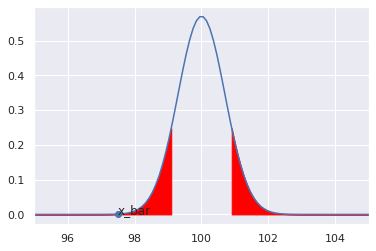

In [89]:

# Defining the x minimum and x maximum
x_min = 95
x_max = 105


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sd / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


#### From the above graph we can clearly see that the $ \bar{x} $ is reside in left side critical point.That's why we have reject the NULL hypothesis.

## <h2 align="center" style='color:#1919fa'> Thank You </h2>